In [1]:
import scqubits as scq
import numpy as np
from scqubits import ParameterSweep

In [2]:


tmon1 = scq.TunableTransmon(
    EJmax=40.0,
    EC=0.2,
    d=0.1,
    flux=0.23,
    ng=0.3,
    ncut=40,
    truncated_dim=3,     # after diagonalization, we will keep 3 levels
    id_str="tmon1"       # optional, used for referencing from within
                         # ParameterSweep or HilbertSpace
)

tmon2 = scq.TunableTransmon(
    EJmax=15.0,
    EC=0.15,
    d=0.2,
    flux=0.0,
    ng=0.0,
    ncut=30,
    truncated_dim=3,
    id_str="tmon2"
)

resonator = scq.Oscillator(
    E_osc=4.5,
    truncated_dim=4    # up to 3 photons (0,1,2,3)
)

hilbertspace = scq.HilbertSpace([tmon1, tmon2, resonator])


g1 = 0.1  # coupling resonator-CPB1 (without charge matrix elements)
g2 = 0.2  # coupling resonator-CPB2 (without charge matrix elements)

hilbertspace.add_interaction(
    g_strength = g1,
    op1 = tmon1.n_operator,
    op2 = resonator.creation_operator,
    add_hc = True,
    id_str="tmon1-resonator"  # optional keyword argument
)

hilbertspace.add_interaction(
    g_strength = g2,
    op1 = tmon2.n_operator,
    op2 = resonator.creation_operator,
    add_hc = True,
    id_str="tmon2-resonator"  # optional keyword argument
)

pname1 = 'flux'
flux_vals = np.linspace(0.0, 2.0, 171)
pname2 = 'ng'
ng_vals = np.linspace(-0.5, 0.5, 49)

# combine into a dictionary
paramvals_by_name = {pname1: flux_vals, pname2: ng_vals}


area_ratio = 1.2

def update_hilbertspace(flux, ng):  # function that defines how Hilbert space components are updated
    tmon1.flux = flux
    tmon2.flux = area_ratio * flux
    tmon2.ng = ng

# dictionary with information on which subsystems are affected by changing parameters
subsys_update_info = {pname1: [tmon1, tmon2],
                      pname2: [tmon2]}


# create the ParameterSweep
sweep = ParameterSweep(
    hilbertspace=hilbertspace,
    paramvals_by_name=paramvals_by_name,
    update_hilbertspace=update_hilbertspace,
    evals_count=20,
    subsys_update_info=subsys_update_info,
    num_cpus=5
)



Parallel compute bare eigensys for subsystem tmon1 [num_cpus=5]

Parallel compute bare eigensys for subsystem tmon2 [num_cpus=5]

Parallel compute bare eigensys for subsystem Oscillator_1 [num_cpus=5]

Parallel compute dressed eigensys [num_cpus=5]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\Phi_{ext}/\\Phi_0$', ylabel='energy [GHz]'>)

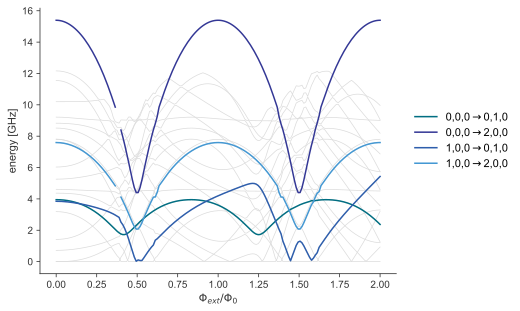

In [3]:
sweep["ng":0.0].plot_transitions(initial=[(0, 0, 0), (1, 0, 0)], final=[(0, 1, 0), (2, 0, 0)])


In [4]:
sweep["ng":0.0].plot_transitions(initial=[(0, 0, 4), (1, 0, 0)], final=[(0, 1, 0), (2, 0, 0)])


ValueError: Initial state tuple exceeds subsystem dimensions.

In [ ]:
sweep["ng":0.0].plot_transitions(initial=[(0, 0, 1), (1, 0, 0)], final=[(0, 1, 0), (2, 0, 0)])
